# Visualisation of Performance of Pytorch calculations

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [2]:
n_c = 1000
run = 3

In [3]:
tf_files_dir = "/Users/dj/Documents/GitHub/Master_Thesis/Code/ImageNet_HBL/runs/"
dataset = "pthimnet"
main_dir = os.path.join(tf_files_dir, dataset)
for config_name in os.listdir(main_dir)[1:2]:
    total_path = os.path.join(tf_files_dir, dataset, config_name)
    eventfile_name = os.listdir(total_path)[0]
    print(eventfile_name)
    total_path = total_path + '/' + eventfile_name
    print(total_path)

    DEFAULT_SIZE_GUIDANCE = {
            "compressedHistograms": 1,
            "images": 1,
            "scalars": 0,  # 0 means load all
            "histograms": 1,
        }

    event_acc = EventAccumulator(total_path, DEFAULT_SIZE_GUIDANCE)
    event_acc.Reload()

    for tag in event_acc.Tags()['scalars']:
        values = event_acc.Scalars(tag)
        print(values)
        values_np = np.zeros((len(values), 1))

        for ti, tl in enumerate(values):
            values_np[ti,0] = tl.value

        numpy_save_dir = f'/Users/dj/Documents/GitHub/Master_Thesis/Code/ImageNet_HBL/runs/pthimnet/test/numpy_save{n_c}_{run}/'
        new_tag = tag.replace('/','_')
        value_dir = os.path.join(numpy_save_dir, new_tag)
        if not os.path.exists(value_dir):
            os.makedirs(value_dir)

        file_name = os.path.join(value_dir, config_name)
        np.save(file_name, values_np)


numpy_save1000_2
/Users/dj/Documents/GitHub/Master_Thesis/Code/ImageNet_HBL/runs/pthimnet/test/numpy_save1000_2
[ScalarEvent(wall_time=1650524931.2694483, step=0, value=0.010096825659275055), ScalarEvent(wall_time=1650525812.4105113, step=1, value=0.006814005319029093), ScalarEvent(wall_time=1650526709.9525926, step=2, value=0.0067759244702756405), ScalarEvent(wall_time=1650527573.5025623, step=3, value=0.006775245536118746)]
[ScalarEvent(wall_time=1650524931.2696884, step=0, value=0.0010092360898852348), ScalarEvent(wall_time=1650525812.4107556, step=1, value=0.0010685570305213332), ScalarEvent(wall_time=1650526709.9527829, step=2, value=0.0010427992092445493), ScalarEvent(wall_time=1650527573.5027688, step=3, value=0.0010482630459591746)]


# Visualisation

In [4]:
n_c = 1000
run = 3

In [6]:
acc_test = np.load(f"/Users/dj/Documents/GitHub/Master_Thesis/Code/ImageNet_HBL/runs/pthimnet/test/numpy_save{n_c}_{run}/Accuracy_test/test.npy")
acc_train = np.load(f"/Users/dj/Documents/GitHub/Master_Thesis/Code/ImageNet_HBL/runs/pthimnet/test/numpy_save{n_c}_{run}/Accuracy_train/test.npy")
loss_test = np.load(f"/Users/dj/Documents/GitHub/Master_Thesis/Code/ImageNet_HBL/runs/pthimnet/test/numpy_save{n_c}_{run}/Loss_test/test.npy")
loss_train = np.load(f"/Users/dj/Documents/GitHub/Master_Thesis/Code/ImageNet_HBL/runs/pthimnet/test/numpy_save{n_c}_{run}/Loss_train/test.npy")


x_train = np.arange(1,len(loss_train) + 1)
x_test = np.arange(1,len(loss_test) + 1)

Text(0.5, 1.0, 'Loss Train')

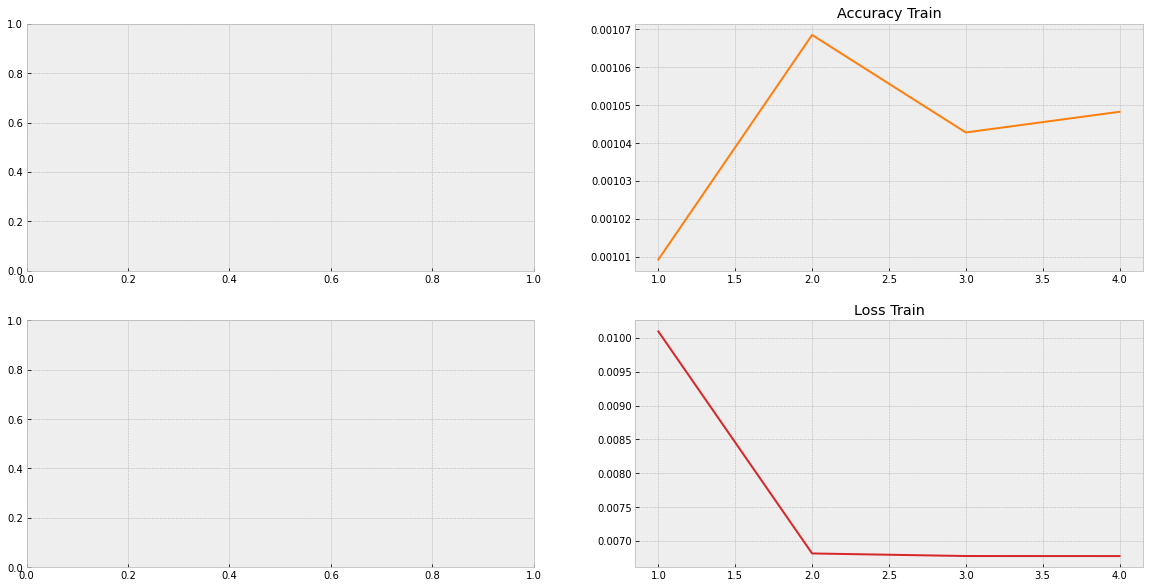

In [7]:
style.use('bmh')

fig, axs = plt.subplots(2, 2,figsize=(20,10))
axs[0, 0].plot(x_test, acc_test)
axs[0, 0].set_title('Accuracy Test', color='black')
axs[0, 1].plot(x_train, acc_train, 'tab:orange')
axs[0, 1].set_title('Accuracy Train', color='black')
axs[1, 0].plot(x_test, loss_test, 'tab:green')
axs[1, 0].set_title('Loss Test', color='black')
axs[1, 1].plot(x_train, loss_train, 'tab:red')
axs[1, 1].set_title('Loss Train', color='black')
#fig.tight_layout()

In [58]:
len(acc_train)

100

In [ ]:
# acc_test = np.load(f"/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/runs/syndat/test/numpy_save100/Accuracy_test/test.npy")
# acc_train = np.load(f"/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/runs/syndat/test/numpy_save100/Accuracy_train/test.npy")
# loss_test = np.load(f"/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/runs/syndat/test/numpy_save100/Loss_test/test.npy")
# loss_train = np.load(f"/Users/dj/Documents/GitHub/Master_Thesis/Code/SynDat_HBL/runs/syndat/test/numpy_save100/Loss_train/test.npy")